In [19]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

import seaborn as sn
import matplotlib.pyplot as plt

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [2]:
# Reading the file csv into dataframe

data = pd.read_csv('CE802_P3_Data/CE802_P3_Data.csv')

Check the Correlation of features and target variable

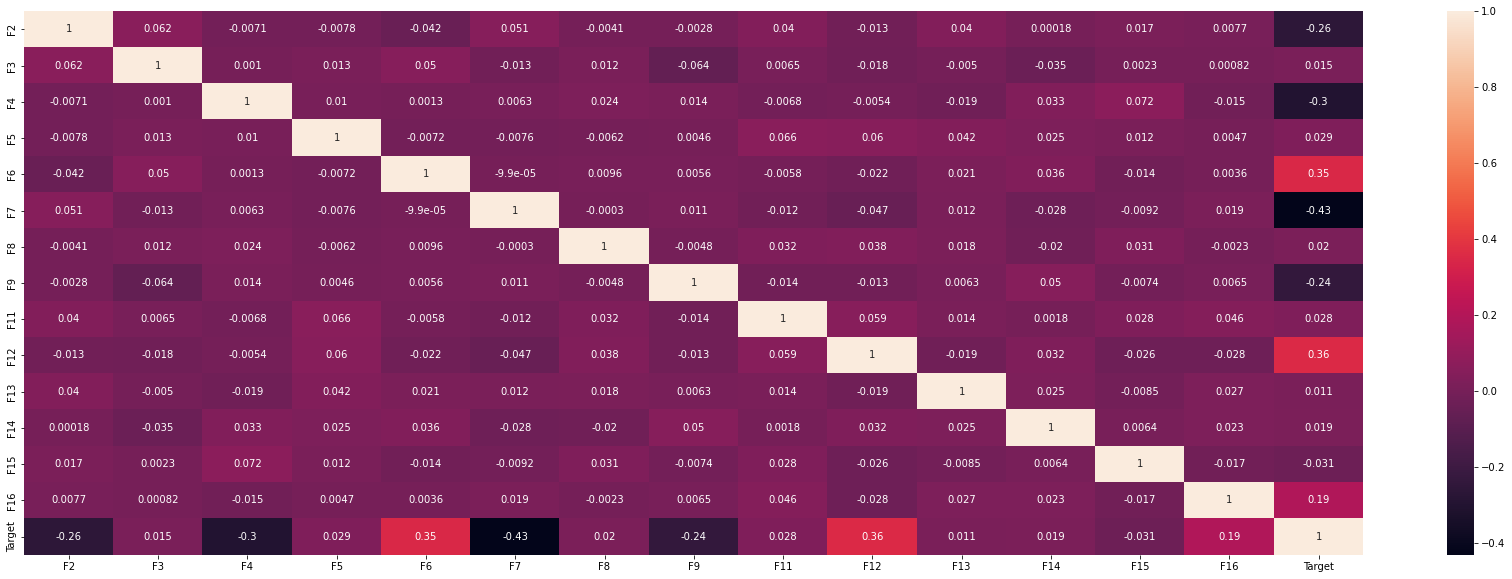

In [7]:
# features do not show high correlation with Target variable
sn.heatmap(data.corr(), annot=True)
plt.rcParams["figure.figsize"] = (30,8)
plt.show()

Check categorical and Numerical Features

In [8]:
# F1 and F10 are categorical features , other are numerical
data.describe()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,F15,F16,Target
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-630.78434,-92.061967,-2311.234440,24115.645020,4.041660,60.448080,-6.962873,11.828000,127.205547,8.109187,-3.634847,29.630000,176.946267,3.947333,922.082533
std,904.26205,29.857614,889.404292,13329.106617,2.893909,58.613624,3.024250,5.430108,1548.308592,5.812853,3.040026,12.549426,84.482786,1.836702,1092.331874
min,-3708.93000,-210.780000,-5503.920000,-35169.510000,0.040000,-144.460000,-16.390000,0.000000,0.000000,0.080000,-13.700000,-53.220000,-204.060000,0.000000,0.000000
25%,-1233.33000,-112.110000,-2926.252500,17982.390000,1.945000,21.720000,-9.080000,9.000000,0.260000,3.815000,-5.590000,23.955000,134.800000,3.000000,0.000000
50%,-641.53500,-92.015000,-2302.755000,24118.815000,3.415000,62.060000,-6.960000,12.000000,2.020000,6.740000,-3.530000,29.685000,177.070000,4.000000,429.570000
75%,-3.56250,-71.195000,-1703.347500,30824.220000,5.492500,99.740000,-4.840000,15.000000,13.610000,10.945000,-1.655000,35.565000,216.945000,5.000000,1530.205000
max,2521.86000,13.160000,671.100000,85176.180000,23.390000,239.820000,2.060000,30.000000,54949.060000,45.140000,6.070000,78.390000,738.880000,11.000000,3960.010000


Identify and Handle Outliers

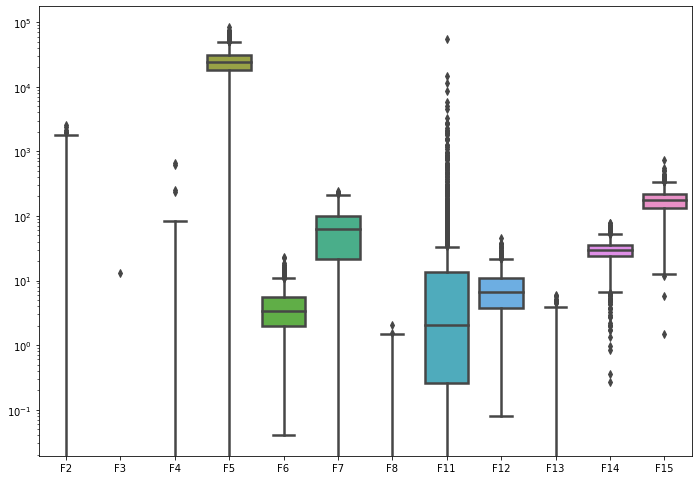

In [9]:
# To check outliers we draw box plot
# We can observe outliers in the features

import matplotlib.pyplot as plt
import seaborn as sns


a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=data[['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8','F11', 'F12', 'F13', 'F14', 'F15']],linewidth=2.5,ax=ax)
g.set_yscale("log")


In [11]:

def check_skew(df):
    '''
    function to calculate skewness of dataframe columns
    '''
    for col in df.describe().columns:
        print(col, ":", data[col].skew())
        
        
# The non zero values suggest +ve or -ve skewness in features        
check_skew(data)

F2 : 0.025422567742220275
F3 : -0.04586130023764964
F4 : -0.025181315029252156
F5 : -0.06466433907812724
F6 : 1.4979207676780362
F7 : -0.12785099075467252
F8 : 0.01836748413840109
F9 : 0.39369661525046684
F11 : 30.682087819694214
F12 : 1.4582597209992099
F13 : -0.08723070425395389
F14 : -0.446733863219525
F15 : 0.045611265940565276
F16 : 0.39072720821412676
Target : 1.1191255159225328


In [12]:
def cap_oulier_values(df , cols):
    ''' 
    Function to cap the values of the features using the IQR
    '''
    for col in cols:
        iqr1 = df[col].quantile(0.1)
        iqr2 = df[col].quantile(0.9)
        df[col] = np.where(df[col] < iqr1, iqr1 ,df[col])
        df[col] = np.where(df[col] > iqr2, iqr2 ,df[col])
    return df

In [13]:
data = cap_oulier_values(data,['F5','F11'])

In [14]:
check_skew(data)


F2 : 0.025422567742220275
F3 : -0.04586130023764964
F4 : -0.025181315029252156
F5 : -0.06131111053111952
F6 : 1.4979207676780362
F7 : -0.12785099075467252
F8 : 0.01836748413840109
F9 : 0.39369661525046684
F11 : 1.7636567266382157
F12 : 1.4582597209992099
F13 : -0.08723070425395389
F14 : -0.446733863219525
F15 : 0.045611265940565276
F16 : 0.39072720821412676
Target : 1.1191255159225328


Handle Categorical Data

In [15]:
# Convert categorical F1 and F10 columns to numerical one hot encoding
data = pd.get_dummies(data, columns= ['F1','F10'])
data.head()

,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,...,Target,F1_Europe,F1_Rest,F1_UK,F1_USA,F10_High,F10_Low,F10_Medium,F10_Very high,F10_Very low
0,258.63,-162.72,-2229.84,31489.95,2.52,192.26,-11.99,12,84.548,11.44,...,0.00,0,0,1,0,0,0,0,0,1
1,1033.35,-105.16,-2786.58,24534.99,7.18,46.52,-10.66,15,0.040,7.78,...,1073.28,1,0,0,0,0,0,0,1,0
2,-1207.47,-112.02,-3162.63,23017.47,3.85,71.06,-4.24,24,16.320,8.14,...,1203.67,0,0,1,0,0,0,1,0,0
3,-1090.17,-99.53,-3784.14,25597.56,1.18,-8.54,-4.70,18,1.080,2.28,...,789.66,0,0,0,1,1,0,0,0,0
4,-2191.02,-69.12,-2956.14,24770.94,6.22,55.22,-7.82,9,84.548,13.82,...,2093.67,1,0,0,0,0,1,0,0,0


Create Pipeline

In [16]:
# Stardize features using Standard Scalar
num_pipeline = Pipeline([('scale', StandardScaler())])
data_arr_scaled = num_pipeline.fit_transform(data.loc[:,['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F11', 'F12', 'F13','F14', 'F15']])
data.loc[:,['F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F11', 'F12', 'F13','F14', 'F15']]  = data_arr_scaled
data = data[['F1_Europe', 'F1_Rest', 'F1_UK', 'F1_USA', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F10_High', 'F10_Low', 'F10_Medium', 'F10_Very high', 'F10_Very low','Target']]
data.head()

,F1_Europe,F1_Rest,F1_UK,F1_USA,F2,F3,F4,F5,F6,F7,...,F13,F14,F15,F16,F10_High,F10_Low,F10_Medium,F10_Very high,F10_Very low,Target
0,0,0,1,0,0.983908,-2.367289,0.091546,0.803133,-0.525990,2.249577,...,-0.373527,1.787132,-0.064961,6,0,0,0,0,1,0.00
1,1,0,0,0,1.840937,-0.438829,-0.534632,0.040852,1.084826,-0.237705,...,-1.048088,-0.250294,-0.682097,4,0,0,0,1,0,1073.28
2,0,0,1,0,-0.637954,-0.668663,-0.957584,-0.125472,-0.066251,0.181109,...,0.896622,-0.212033,-1.906187,7,0,0,1,0,0,1203.67
3,0,0,0,1,-0.508192,-0.250205,-1.656611,0.157312,-0.989186,-1.177390,...,-1.475859,0.455153,-0.007415,1,1,0,0,0,0,789.66
4,1,0,0,0,-1.726000,0.768635,-0.725340,0.066713,0.752984,-0.089225,...,-0.751939,0.146669,-0.698674,4,0,1,0,0,0,2093.67


Split Test and Train Data

In [17]:
from sklearn.model_selection import train_test_split


train_X = data.drop(columns=['Target'])
train_Y = data['Target']

# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size=0.25, random_state=0, shuffle=True)

# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1125, 23), (375, 23), (1125,), (375,))

In [44]:
# In the below code, we are
# Training using a model object
# Choosing the best parameters for the model using Grid Search CV
# Performing an outer cross validation loop and nested parameter tuning 

def fit_model_with_best_parameters(model, params, X, y, grid_search = True, X_t = '', y_t = ''):
    if len(X_t) > 0:
        t_x = X_t
    else:
        t_x = test_x
    if len(y_t) > 0:
        t_y = y_t
    else:
        t_y = test_y
        
    if grid_search:
        grid_search_cv = GridSearchCV(model, params)
        grid_search_cv.fit(X,y)
        scores = cross_val_score(grid_search_cv, X, y, cv=5, scoring="neg_mean_squared_error")  # cross-validation
        print('Mean RMSE :',np.sqrt((scores*-1).mean()))
        print("Parameters : ",grid_search_cv.best_params_)
        predict_test  = grid_search_cv.predict(t_x)
        predict_test  = np.where(predict_test<0 , 0, predict_test)
        print('RMSE on Test data: ',  mean_squared_error(t_y, predict_test)**0.5)
        
        return grid_search_cv.best_estimator_, grid_search_cv.best_params_
    else:
        model.fit(X, y)

        # predict the target on train and test data 
        predict_train = model.predict(X)
        predict_train = np.where(predict_train<0 , 0, predict_train)
        predict_test  = model.predict(t_x)
        predict_test  = np.where(predict_test<0 , 0, predict_test)

        # Root Mean Squared Error on train and test date
        print('RMSE on train data: ', mean_squared_error(y, predict_train)**0.5)
        print('RMSE on Test data: ',  mean_squared_error(t_y, predict_test)**0.5)
        return model
    

Model Training

Linear Regression

In [28]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_LR = fit_model_with_best_parameters(model,'', train_x, train_y, grid_search = False)

RMSE on train data:  425.9996754120856
RMSE on Test data:  442.60859832393555


Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only = False)
X_poly = poly_features.fit_transform(train_x)
Xt_poly = poly_features.transform(test_x)

model = LinearRegression()
model_PR = fit_model_with_best_parameters(model,'', X_poly, train_y, grid_search = False,X_t = Xt_poly)

RMSE on train data:  265.8831280182819
RMSE on Test data:  340.7176248735591


Regularized Regression

Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

X_poly = poly_features.fit_transform(train_x)
Xt_poly = poly_features.transform(test_x)

params = {
            'alpha': [1,0.1,0.01] , 
             "fit_intercept": [True, False], 
             "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
         }

model = Ridge()

model_ridge = fit_model_with_best_parameters(model,params, X_poly, train_y, grid_search = True, X_t = Xt_poly)